In [1]:
import numpy as np
import pandas as pd

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [25]:
df_orig = pd.read_csv('housing.csv')
df_orig

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


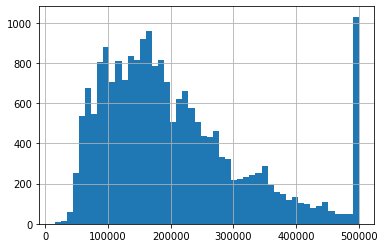

In [26]:
df_orig.median_house_value.hist(bins=50);

Yes, lots of values at the right extreme.

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [27]:
df_orig.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [32]:
df = df_orig[df_orig.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])].copy()
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

### Question 1

There's one feature with missing values. What is it?

In [33]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Answer 1**: total_bedrooms

### Question 2

What's the median (50% percentile) for variable `'population'`?

In [34]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

**Answer 2**: 1195

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

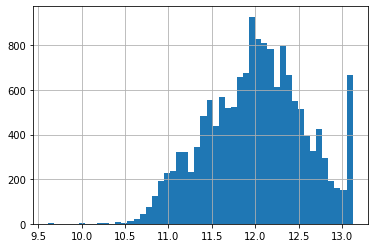

In [35]:
df.median_house_value = np.log1p(df.median_house_value)
df.median_house_value.hist(bins=50);

In [36]:
np.random.seed(42)
idx = list(df.index) 
np.random.shuffle(idx)
assert idx != list(df.index)
df.index[:5], idx[:5]

(Index([701, 830, 859, 860, 861], dtype='int64'),
 [19963, 5929, 11377, 6443, 17546])

In [37]:
n = df.shape[0]
n_test = round(n * 0.2)
n_val = round(n * 0.2)
n_train = n - n_test - n_val
assert n == n_train + n_val + n_test
print(n, n_train, n_val, n_test)

15687 9413 3137 3137


In [42]:
len(df), df.index.min(), df.index.max()

(15687, 701, 20639)

In [44]:
df_train = df.loc[idx[ : n_train], :]
df_val = df.loc[idx[n_train : n_train + n_val], :]
df_test = df.loc[idx[n_train + n_val: ], :]
df_train.shape, df_val.shape, df_test.shape

((9413, 10), (3137, 10), (3137, 10))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good